In [1]:
import numpy as np
import pandas as pd

from sklearn import metrics
from sklearn import model_selection
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import Binarizer, LabelEncoder, MaxAbsScaler, MinMaxScaler, OneHotEncoder, \
    OrdinalEncoder, RobustScaler, StandardScaler

# Exercise 2 - Debugging - Drugs

The dataset contains a set of patients, all of whom suffered from the same illness.
During their course of treatment, each patient responded to one of 5 medications: Drug A, Drug B, Drug c, Drug x or y.

This complex dataset proposes a set of challenges that you'll try to overcome. A basic ML pipeline is already in place. You have to optimize the performance of the model by applying good practices, debugging pre-processing errors, etc.

**Rules**:
- Do not use other modules than those already imported *(or do it only if your own code is not working. In this case, keep your own code in the notebook, commented, so that we know what you tried)*.
- Explain **all** of your choices. For every task, choose the most appropriate option for this problem and describe your choice.
- You can modify any parts of the code or replace the model by one already used in previous PWs.

**Work to do**:
- [x] Apply a type of normalization.
- [x] Encode categorical data.
- [x] Use all columns in the dataset (or choose the most meaningful features).
- [x] Choose a more appropriate metric.
- [x] Optimize hyper-parameters.
- [x] Test the model performance correctly using a separated test set.
- Apply **two** of those techniques:
  - [x] Keep relative class frequencies in the train/test sets (check train_test_split docs)
  - [x] Show which feature(s) are the most correlated to the target.
  - [ ] Use cross-validation.

In [2]:
df = pd.read_csv("drug.csv")
df.head()

age sex      bp cholesterol  Na_to_K   drug
0   23   F    HIGH        HIGH   25.355  drugY
1   47   M     LOW        HIGH   13.093  drugC
2   47   M     LOW        HIGH   10.114  drugC
3   28   F  NORMAL        HIGH    7.798  drugX
4   61   F     LOW        HIGH   18.043  drugY

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          200 non-null    int64  
 1   sex          200 non-null    object 
 2   bp           200 non-null    object 
 3   cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [4]:
categorical_columns = ["sex", "bp", "cholesterol", "drug"]

# TODO: you will replace this by a more adapted preprocessing step
#df = df.drop(columns=["sex", "bp", "cholesterol"])
# TODO: a preprocessing step is likely missing here...
# Binarizer, LabelEncoder, MaxAbsScaler, MinMaxScaler, OneHotEncoder, OrdinalEncoder, RobustScaler, StandardScaler

# normalize
scaler = MaxAbsScaler()

scaler.fit(df[['Na_to_K']])
df.Na_to_K = scaler.transform(df[['Na_to_K']])

scaler.fit(df[['age']])
df.age = scaler.transform(df[['age']])

# Encode categorical data

# Sex in binary :)
for i in df.sex.values:
    if i  == 'M':
        df.sex.replace(i, -1, inplace = True)
    elif i == 'F':
        df.sex.replace(i, 1, inplace = True)

# bp decreasy remplacement
for i in df.bp.values:
    if i == 'LOW':
        df.bp.replace(i, -1, inplace = True)
    elif i == 'NORMAL':
        df.bp.replace(i, 0, inplace = True)
    elif i == 'HIGH':
        df.bp.replace(i, 1, inplace = True)

# cholesterol in binary
for i in df.cholesterol.values:
    if i == 'NORMAL':
        df.cholesterol.replace(i, -1, inplace = True)
    elif i == 'HIGH':
        df.cholesterol.replace(i, 1, inplace = True)

    
#for i in df.drug.values:
#    if i == 'drugA':
#        df.drug.replace(i, -1, inplace = True)
#    elif i == 'drugB':
#        df.drug.replace(i, -0.5, inplace = True)
#    elif i == 'drugC':
#        df.drug.replace(i, 0, inplace = True)
#    elif i == 'drugX':
#        df.drug.replace(i, 0.5, inplace = True)
#    elif i == 'drugY':
#        df.drug.replace(i, 1, inplace = True)       

print(df)

          age  sex  bp  cholesterol   Na_to_K   drug
0    0.310811    1   1            1  0.662928  drugY
1    0.635135   -1  -1            1  0.342328  drugC
2    0.635135   -1  -1            1  0.264439  drugC
3    0.378378    1   0            1  0.203885  drugX
4    0.824324    1  -1            1  0.471749  drugY
..        ...  ...  ..          ...       ...    ...
195  0.756757    1  -1            1  0.302429  drugC
196  0.216216   -1  -1            1  0.313907  drugC
197  0.702703   -1   0            1  0.258687  drugX
198  0.310811   -1   0           -1  0.366565  drugX
199  0.540541    1  -1           -1  0.296729  drugX

[200 rows x 6 columns]


In [5]:
X = df.drop(columns="drug")
y = df["drug"]
print(y)

0      drugY
1      drugC
2      drugC
3      drugX
4      drugY
       ...  
195    drugC
196    drugC
197    drugX
198    drugX
199    drugX
Name: drug, Length: 200, dtype: object


In [6]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y) # Keep relative class frequencies in the train/test sets (check train_test_split docs)
print(df)

          age  sex  bp  cholesterol   Na_to_K   drug
0    0.310811    1   1            1  0.662928  drugY
1    0.635135   -1  -1            1  0.342328  drugC
2    0.635135   -1  -1            1  0.264439  drugC
3    0.378378    1   0            1  0.203885  drugX
4    0.824324    1  -1            1  0.471749  drugY
..        ...  ...  ..          ...       ...    ...
195  0.756757    1  -1            1  0.302429  drugC
196  0.216216   -1  -1            1  0.313907  drugC
197  0.702703   -1   0            1  0.258687  drugX
198  0.310811   -1   0           -1  0.366565  drugX
199  0.540541    1  -1           -1  0.296729  drugX

[200 rows x 6 columns]


In [7]:
# TODO: a preprocessing step is likely missing here...
# Binarizer, LabelEncoder, MaxAbsScaler, MinMaxScaler, OneHotEncoder, OrdinalEncoder, RobustScaler, StandardScaler




In [8]:
knn = KNeighborsClassifier(5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [9]:
def predict(estimator, X, y):
    # predict
    y_pred = knn.predict(X)
    
    # show confusion matrix
    cm = confusion_matrix(y, y_pred)
    disp=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
    disp.plot();
    
    # check metric (this one is probably not the best choice...)
    metric = metrics.accuracy_score(y, y_pred)

    print(f"Accuracy: {metric}")

Accuracy: 0.8875


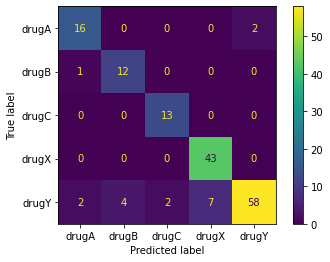

In [10]:
predict(knn, X_train, y_train)

Accuracy: 0.775


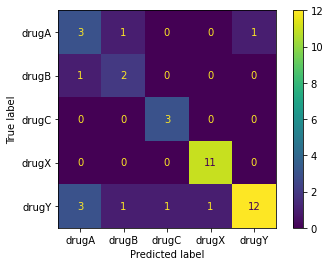

In [11]:
predict(knn, X_test, y_test)

In [33]:
# TODO: any of the 3 proposed task...

# Keep relative class frequencies in the train/test sets (check train_test_split docs :
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Show which feature(s) are the most correlated to the target.
print(df.corr())

                  age       sex        bp  cholesterol   Na_to_K
age          1.000000 -0.102027 -0.120918     0.068234 -0.063119
sex         -0.102027  1.000000  0.044952    -0.008811  0.125008
bp          -0.120918  0.044952  1.000000    -0.032208  0.036871
cholesterol  0.068234 -0.008811 -0.032208     1.000000 -0.010000
Na_to_K     -0.063119  0.125008  0.036871    -0.010000  1.000000
